In [1]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
from numpy import mean,std

In [2]:
X, y = make_classification(n_samples=1000,n_features=20, n_informative=15, n_redundant=5, random_state=2)

In [3]:
def get_voting(number_of_ensembles):
    models=list()
    for i in range(1,number_of_ensembles):
        models.append(('SVC'+str(i),SVC(probability=True, kernel='poly', degree=i)))
    
    ensemble = VotingClassifier(estimators=models, voting='soft')
    return ensemble

In [4]:
# get a list of models to evaluate
def get_models(number_of_ensembles):
    models = dict()
    for i in range(1,number_of_ensembles):
         models['svc'+str(i)] = SVC(probability=True, kernel='poly', degree=i)
    models['soft-voting'] = get_voting(number_of_ensembles)
    return models

In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def evaluate_model(model, X,y):
     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
     scores = cross_val_score(model, X,y,scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
     return scores
    

>svc1 0.855 (0.035)
>svc2 0.859 (0.034)
>svc3 0.890 (0.035)
>svc4 0.808 (0.037)
>soft-voting 0.924 (0.026)


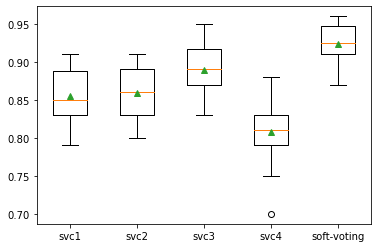

In [6]:
models = get_models(5)
results, names = list(),list()

for name,model in models.items():
    scores= evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
    